Each row in the dataset represents a single Senator, and each column represents a vote(0=No, 1=Yes, 0.5=Abstained)

In [2]:
import numpy as np
import pandas as pd

In [3]:
votes = pd.read_csv("114_congress.csv")

In [4]:
votes.head(5)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [5]:
print(votes["party"].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


## Clustering
Group similar senators together by using Euclidean distance! <br>

In [6]:
from sklearn.metrics.pairwise import euclidean_distances

In [9]:
euclidean_distances(votes.iloc[0,3:].reshape(1,-1), votes.iloc[2,3:].reshape(1,-1))

c:\users\juwon lee\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[3.31662479]])

## K-Means Clustering
K-means clustering uses Euclidean distance to form clusters of similar Senators. Since we expect senators to cluster along party lines, we'll pick 2 for our number of clusters. Because we aren't predicting anything (we're only clustering), we're not worried about overfitting. 

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans_model = KMeans(n_clusters=2, random_state=1)

In [12]:
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])

In [13]:
labels = kmeans_model.labels_

In [14]:
labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [16]:
pd.crosstab(votes["party"], labels)

col_0,0,1
party,,
D,41,3
I,2,0
R,0,54


In [17]:
democratic_outliers = votes[ (votes["party"]=='D') & (labels==1)]

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

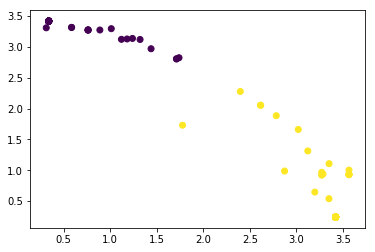

In [20]:
plt.scatter(senator_distances[:,0], senator_distances[:,1], c=labels)

Let's identify extreme republicans & extreme democrats. In order to come up with a formula to identify these extreme points, we cube each distance before we sum them together. 

In [24]:
extremism = np.sum(senator_distances**3, axis=1)

In [25]:
votes["extremism"] = extremism

In [29]:
votes = votes.sort_values("extremism", ascending=False)

In [30]:
votes.head(10) #The 10 most extreme politicians

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
77,Rounds,R,SD,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
23,Cornyn,R,TX,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
70,Perdue,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
22,Corker,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
72,Portman,R,OH,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
